<a href="https://colab.research.google.com/github/yusrilandrian/TugasPraktikumML_167-269/blob/main/ML_TUGBES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import InputLayer, Dense, Flatten, BatchNormalization, Dropout, Input
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.applications.vgg16 import VGG16
from google.colab import files
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import matplotlib.image as mpimg
import cv2
import glob
import os
from tqdm.notebook import tqdm as tq
import zipfile
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/ML'

In [ ]:
%cd /content/drive/MyDrive/ML

/content/drive/MyDrive/ML


In [ ]:
ls

basic_cnn_orchids.h5  Dataset/     modelfix.h5          vgg.h5
dataset/              kaggle.json  my_basic_cnn_model/


In [ ]:
# Definisikan path untuk data train dan data test
base_dir = '/content/drive/MyDrive/ML/dataset/dataset'

val_dir = os.path.join(base_dir, 'validation')
train_dir = os.path.join(base_dir, 'train')  

In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (50,50))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data Validation
validation_data = []
validation_label = []
for r, d, f in os.walk(val_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (50,50))
            validation_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            validation_label.append(label)

validation_data = np.array(validation_data)
validation_label = np.array(validation_label)

In [ ]:
#membuat variabel file_name, tag, fullpath dengan setiap parameter berisikan null atau kosong
file_name = []
tag = []
full_path = []
for path, subdirs, files in os.walk(base_dir):
    for name in files:
        full_path.append(os.path.join(path, name)) 
        tag.append(path.split('/')[-1])        
        file_name.append(name)

In [ ]:
# membuat dataframe dari variabel baru
data = pd.DataFrame({'path':full_path,'file_name':file_name,'tag':tag})
data.groupby(['tag']).size()

tag
Angraecum         622
Brassavola       1094
Brassia          1087
Cattleya          633
Cymbidium         588
Dendrobium        555
Encyclia          671
Epidendrum        659
Lycaste           629
Masdevallia       713
Maxillaria        453
Miltonia          466
Miltoniopsis      653
Odontoglossum     451
Oncidium          479
Paphiopedilum     655
Phalaenopsis      949
Vanda             533
Vanilla           445
Zygopetalum       591
dtype: int64

In [ ]:
x = data['path']
y = data['tag']

In [ ]:
# Splitting
!pip install split_folders

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size=0.20, random_state=1)

In [ ]:
# menyatukan ke dalam masing-masing dataframe
data_tr = pd.DataFrame({'path':X_train, 'tag':y_train, 'set':'training'})
data_val = pd.DataFrame({'path':X_val, 'tag':y_val, 'set':'validation'})

In [ ]:
print('train size', len(data_tr))
print('val size', len(data_val))

train size 10340
val size 2586


In [ ]:
#cek penamaan image 
dataset_path = '/content/drive/MyDrive/ML/dataset/dataset'

data_all = data_tr.append([data_tr, data_val]).reset_index(drop=1)

for index, row in tq(data_all.iterrows()):
    
    #mendeteksi variabel filepath
    file_path = row['path']
    if os.path.exists(file_path) == False:
            file_path = os.path.join(base_dataset,row['tag'],row['image'].split('.')[0])            
    
    #membuat folder destination dirs
    if os.path.exists(os.path.join(dataset_path,row['set'],row['tag'])) == False:
        os.makedirs(os.path.join(dataset_path,row['set'],row['tag']))
    
    #mendefinisikan file destination
    destination_file_name = file_path.split('/')[-1]
    file_dest = os.path.join(dataset_path,row['set'],row['tag'],destination_file_name)
    
    #meng-copy file from source to destination
    if os.path.exists(file_dest) == False:
        shutil.copy2(file_path,file_dest)

0it [00:00, ?it/s]

# **Splitting**

In [ ]:
!pip install split-folders
import splitfolders

In [ ]:
base_dir = '/content/drive/MyDrive/ML/dataset/dataset' #buat base directory

In [ ]:
splitfolders.ratio(base_dir, output='Dataset', seed=1337, ratio=(.8, .19, .01),group_prefix=None) #split folder (membuat data baru dgn nama dataset)



Copying files: 0 files [00:00, ? files/s]

Copying files: 1 files [00:00,  7.19 files/s]

Copying files: 2 files [00:00,  5.88 files/s]

Copying files: 3 files [00:00,  5.55 files/s]

Copying files: 4 files [00:00,  5.81 files/s]

Copying files: 5 files [00:03,  1.00 files/s]

Copying files: 13 files [00:03,  4.87 files/s]

Copying files: 20 files [00:03,  9.07 files/s]

Copying files: 29 files [00:03, 15.93 files/s]

Copying files: 37 files [00:03, 22.33 files/s]

Copying files: 45 files [00:03, 29.68 files/s]

Copying files: 53 files [00:03, 37.25 files/s]

Copying files: 60 files [00:03, 41.52 files/s]

Copying files: 68 files [00:04, 48.93 files/s]

Copying files: 75 files [00:04, 53.24 files/s]

Copying files: 84 files [00:04, 61.91 files/s]

Copying files: 92 files [00:04, 62.85 files/s]

Copying files: 102 files [00:04, 71.16 files/s]

Copying files: 110 files [00:04, 71.24 files/s]

Copying files: 119 files [00:04, 74.72 files/s]

Copying files: 127 files [00:04, 71.21 files/

# **Augmentation Data**

In [ ]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    width_shift_range=0.1,
                    height_shift_range=0.1,)

In [ ]:
input_shape = (300, 300)

train = '/content/drive/MyDrive/ML/Dataset/train'
train_generator = datagen.flow_from_directory(train, 
                                                    target_size=input_shape,
                                                    class_mode ='categorical',
                                                    batch_size = 32,
                                                    color_mode ='rgb',
                                                    shuffle = False) 


validation = '/content/drive/MyDrive/ML/Dataset/val'
validation_generator = datagen.flow_from_directory(validation,
                                                        target_size=input_shape,
                                                        class_mode ='categorical',
                                                        color_mode ='rgb',
                                                        batch_size = 32,
                                                        shuffle = False)


Found 4831 images belonging to 23 classes.
Found 1141 images belonging to 23 classes.


# **Modelling**

In [ ]:
baseModel = VGG16(include_top=False,  weights='imagenet', input_tensor=Input(shape=(300,300,3)))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
class FCHeadNet:
  def build(baseModel, classes, D):
    headModel = baseModel.output
    headModel = Dropout(0.5)(headModel)
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(D, activation='relu')(headModel)
    headModel = Dense(classes, activation='sigmoid')(headModel)
    return headModel

In [ ]:
from tensorflow.keras.models import Model

headModel = FCHeadNet.build(baseModel, 23, 512)
model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
  layer.trainable = False

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 300, 300, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 300, 300, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 300, 300, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 150, 150, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 150, 150, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 150, 150, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 75, 75, 128)       0     

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['acc'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

earlystopping = EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=15)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", mode="min", verbose=1, patience=10, min_delta=0.0001, factor=0.2)       
directory_to_save_best_model_file = 'VGG19.h5'
best_model = ModelCheckpoint(directory_to_save_best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [ ]:
Hi = model.fit(
    train_generator, 
    epochs=50, 
    validation_data= validation_generator
    )

Epoch 1/50
  3/151 [..............................] - ETA: 17:57 - loss: 4.8048 - acc: 0.3333   

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


151/151 [==============================] - 2605s 17s/step - loss: 3.5031 - acc: 0.0727 - val_loss: 2.8708 - val_acc: 0.1867
Epoch 2/50
151/151 [==============================] - 206s 1s/step - loss: 2.9905 - acc: 0.1416 - val_loss: 2.6860 - val_acc: 0.2463
Epoch 3/50
151/151 [==============================] - 206s 1s/step - loss: 2.7368 - acc: 0.1911 - val_loss: 2.6146 - val_acc: 0.2025
Epoch 4/50
151/151 [==============================] - 204s 1s/step - loss: 2.5938 - acc: 0.2302 - val_loss: 2.3727 - val_acc: 0.2918
Epoch 5/50
151/151 [==============================] - 204s 1s/step - loss: 2.3544 - acc: 0.2968 - val_loss: 2.3132 - val_acc: 0.2840
Epoch 6/50
151/151 [==============================] - 205s 1s/step - loss: 2.3209 - acc: 0.2999 - val_loss: 2.1937 - val_acc: 0.3637
Epoch 7/50
151/151 [==============================] - 205s 1s/step - loss: 2.1730 - acc: 0.3560 - val_loss: 2.0769 - val_acc: 0.3777
Epoch 8/50
151/151 [==============================] - 207s 1s/step - loss: 2.1

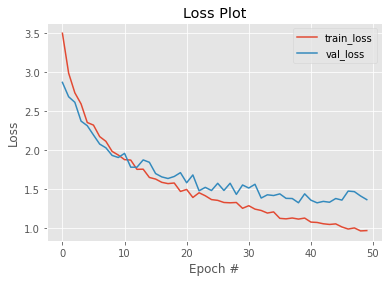

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 50), Hi.history["loss"], label="train_loss")
plt.plot(np.arange(0, 50), Hi.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

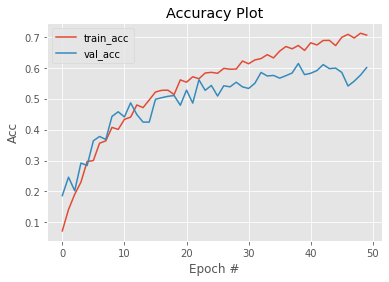

In [ ]:
plt.figure()
plt.plot(np.arange(0, 50), Hi.history["acc"], label="train_acc")
plt.plot(np.arange(0, 50), Hi.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [ ]:
model.save('vgg.h5')

# **Prediksi**

In [ ]:
ypred = model.predict(validation_generator)
predictions = np.argmax(ypred, axis = 1)
print(classification_report(validation_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.55      0.70      0.62        57
           1       0.86      0.68      0.76       100
           2       0.73      0.69      0.71        58
           3       0.68      0.66      0.67        58
           4       0.67      0.44      0.53        54
           5       0.32      0.31      0.32        51
           6       0.43      0.61      0.50        61
           7       0.49      0.40      0.44        60
           8       0.40      0.84      0.54        58
           9       0.54      0.75      0.63        65
          10       0.77      0.24      0.37        41
          11       0.33      0.19      0.24        43
          12       0.50      0.58      0.54        59
          13       0.55      0.39      0.46        41
          14       0.73      0.55      0.62        44
          15       0.78      0.70      0.74        60
          16       0.70      0.89      0.78        88
          17       0.72    

Accuracy: 59.77%


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:2094: UserWarning: labels size, 9, does not match size of target_names, 20
  len(labels), len(target_names)


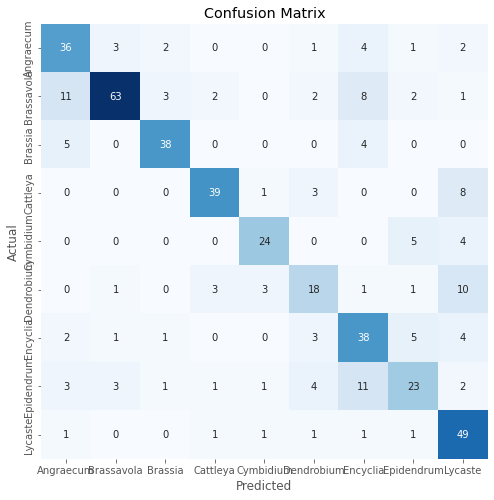

Classification Report:
----------------------
                precision    recall  f1-score   support

    Angraecum       0.49      0.63      0.55        57
   Brassavola       0.85      0.63      0.72       100
      Brassia       0.70      0.66      0.68        58
     Cattleya       0.71      0.67      0.69        58
    Cymbidium       0.56      0.44      0.49        54
   Dendrobium       0.40      0.35      0.38        51
     Encyclia       0.44      0.62      0.52        61
   Epidendrum       0.45      0.38      0.41        60
      Lycaste       0.40      0.84      0.54        58

    micro avg       0.54      0.59      0.57       557
    macro avg       0.56      0.58      0.55       557
 weighted avg       0.58      0.59      0.57       557



In [ ]:
import seaborn as sns
target_name = ['Angraecum', 'Brassavola', 'Brassia', 'Cattleya', 'Cymbidium', 'Dendrobium', 'Encyclia', 'Epidendrum', 'Lycaste', 'Masdevallia',
               'Maxillaria', 'Miltonia', 'Miltoniopsis', 'Odontoglossum', 'Oncidium', 'Paphiopedilum', 'Phalaenopsis', 'Vanda', 'Vanilla', 'Zygopetalum']
acc = model.evaluate(validation_generator, verbose=0)
print("Accuracy: {:.2f}%".format(acc[1] * 100))

predictions = np.argmax(model.predict(validation_generator), axis=1)

cm = confusion_matrix(validation_generator.labels, predictions, labels=[0, 1, 2,3,4,5,6,7,8])
clr = classification_report(validation_generator.labels, predictions, labels=[0, 1, 2,3,4,5,6,7,8], target_names=target_name)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', cbar=False)
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5], labels=target_name)
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5], labels=target_name)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)

In [ ]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np

input_size = (224,224)
channel = (3,)
input_shape = input_size + channel
labels = ['Angraecum', 'Brassavola', 'Brassia', 'Cattleya', 'Cymbidium', 'Dendrobium', 'Encyclia', 'Epidendrum', 'Lycaste', 'Masdevallia',
               'Maxillaria', 'Miltonia', 'Miltoniopsis', 'Odontoglossum', 'Oncidium', 'Paphiopedilum', 'Phalaenopsis', 'Vanda', 'Vanilla', 'Zygopetalum']

In [ ]:
def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)

In [ ]:
from tensorflow.keras.models import load_model

MODEL_PATH = '/content/drive/MyDrive/ML/vgg.h5'
model = load_model(MODEL_PATH,compile=False)

In [ ]:
def perdict(img):
    class_index = list(validation_generator.class_indices.keys())
    test_img = cv2.imread(img)
    test_img = cv2.resize(test_img, (224, 224))
    test_img = test_img.reshape((1, 224, 224, 3))
    pred = model.predict(test_img)
    return class_index[np.argmax(pred)], max(pred.ravel())